**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

# 1. Data Exploration

 ## 1.1. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Loading Data

In [3]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
37887,37888,DEU,52.0,744,0x83D90C2439BAC38FED0E02DE202C08B7CEC43D4C8DDD...,0x4809F1D8AC21DEFD1A2FD27615EBCCD9D5D985B77275...,259,240.3,33.0,0,0,1,6,3,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
23335,23336,FRA,63.0,959,0x0577775534A6EB1F9E38C8DC3131CAE5A6141D69E245...,0x116923010B21CEB4FA851953FE0813EDA28555B124D1...,14,221.6,91.9,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
74894,74895,FRA,77.0,378,0x5ECADAFF8A3E9949BE024264089412E61A7D61BAF549...,0x5FC3FBD94385F191FF0109C73F9742ACA4427E1D75AB...,130,264.6,130.2,0,0,1,6,3,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
103407,103408,CAN,39.0,103,0xDE981E108172D394E29278D86E036795205C1FF275A7...,0xABE7947CFBA80992E770797D9B1B252498BE21C7AC66...,0,0.0,0.0,0,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
59059,59060,DEU,71.0,496,0x1DD4EDDE247EE05B9EC50A4FD492ADB5AB5FF59398B1...,0x48BC72BD51EEF1B4923DB81F068B6CD287EFB8897245...,0,0.0,0.0,0,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


## 1.3. Initial Analysis

### 1.3.1. Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 1.3.2. Missing values

In [7]:
data.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### 1.3.3. Duplicates

In [8]:
# Checking if we have duplicated IDs
data[data.index.duplicated() == True]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### 1.3.4. Statistics

In [9]:
# Maybe Separate even more
data_num = data.select_dtypes(exclude = object)
data_cat = data.select_dtypes(include = object)

In [10]:
data_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.64,17.24,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.03,374.66,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.83,85.12,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.85,379.13,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.68,123.58,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.00,0.08,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.00,0.03,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.74,0.73,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.33,4.63,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.20,2.30,0.0,0.0,2.0,3.0,185.00


In [11]:
data_cat.describe().T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


In [12]:
# Separating binary columns
data_bin = data[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
                 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
                 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]
data_num = data_num.drop(columns=data_bin.columns)


# Data Exploration

## Objectives
* Targeted Marketing: Develop tailored campaigns for specific customer groups to improve engagement and conversions.

* Personalised Offers: Create customized promotions and packages to boost satisfaction and loyalty.

* Service Customisation: Tailor amenities and services to meet the unique needs of different segments.

* Customer Retention: Retain high-value or loyal customers by addressing their preferences.

* Pricing Strategies: Implement dynamic pricing based on segment willingness to pay and booking behavior.

* Identify High-Value Segments: Focus on the most profitable customers to maximize revenue.

* Resource Allocation: Efficiently allocate resources (staff, budget, inventory) based on segment demand.

* Market Positioning: Refine the hotel’s market position using segmentation insights to attract the right customers.

* Competitive Advantage: Differentiate offerings to stand out in the market.

* Predictive Analytics: Use data to anticipate future customer behavior and trends for proactive decision-making.

## Data Distribution

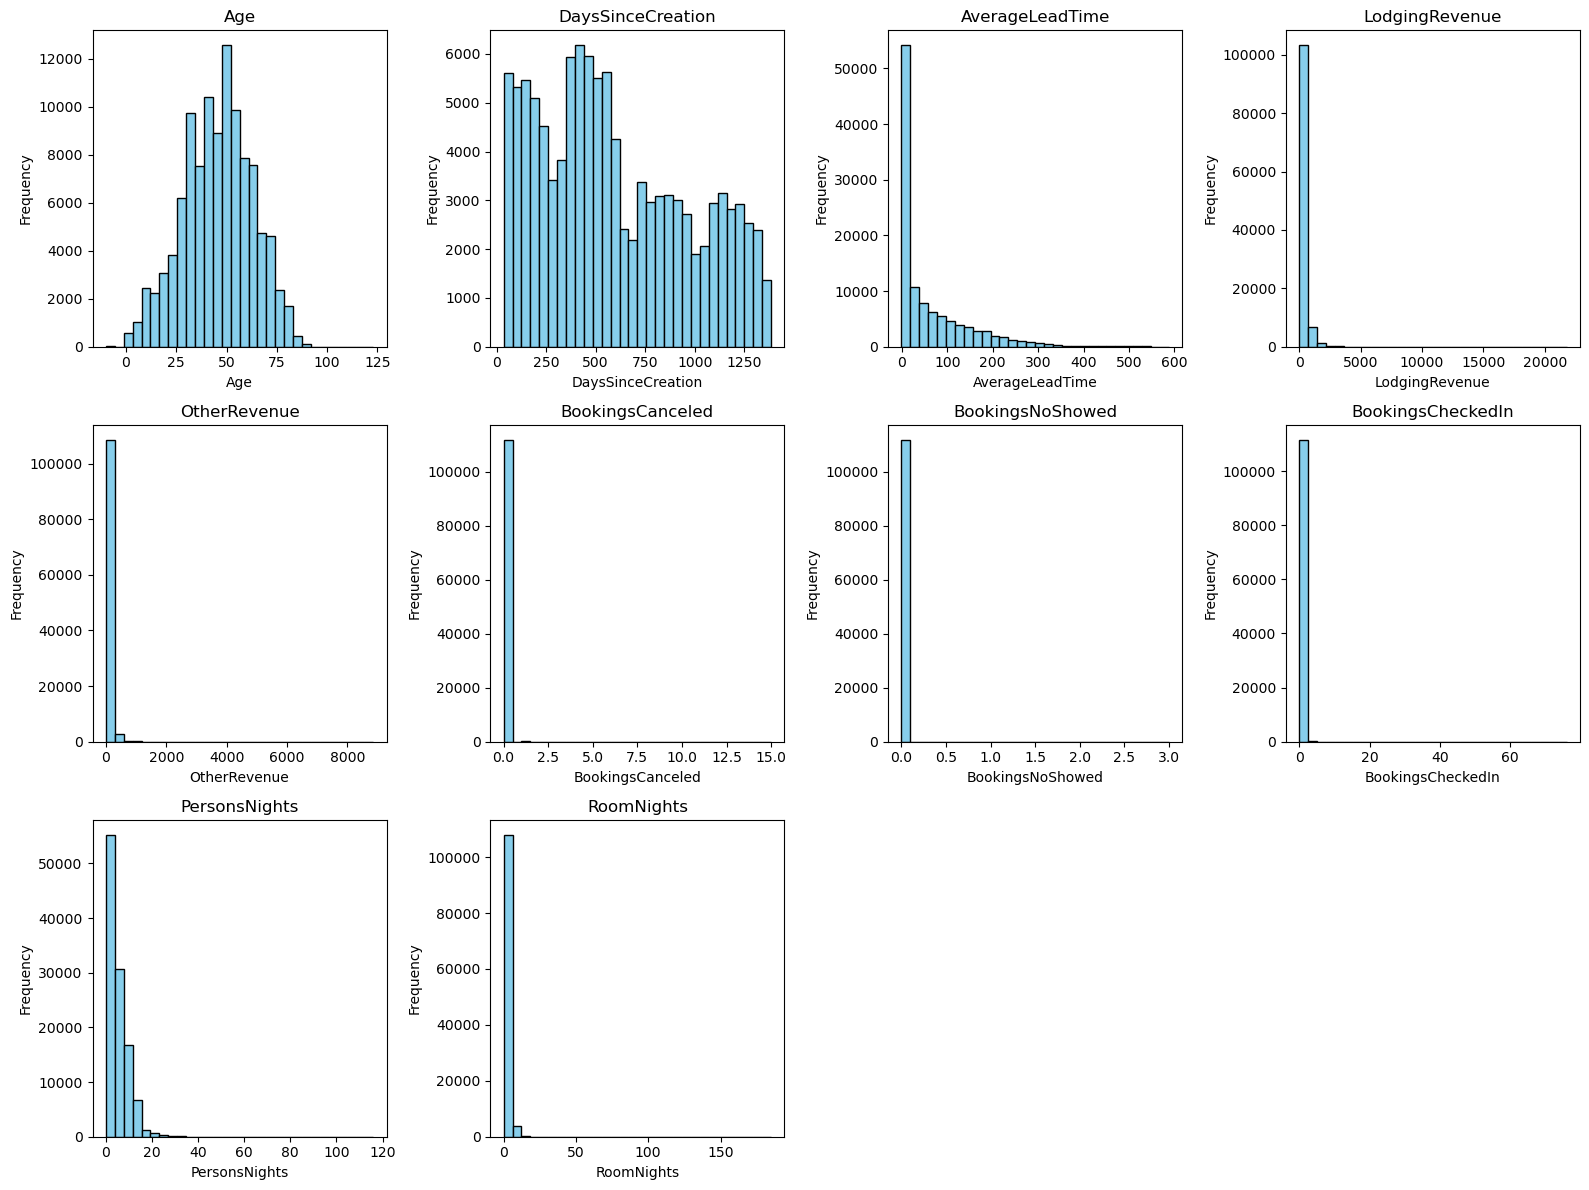

In [13]:
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through numerical columns and create histograms
for i, col in enumerate(data_num):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


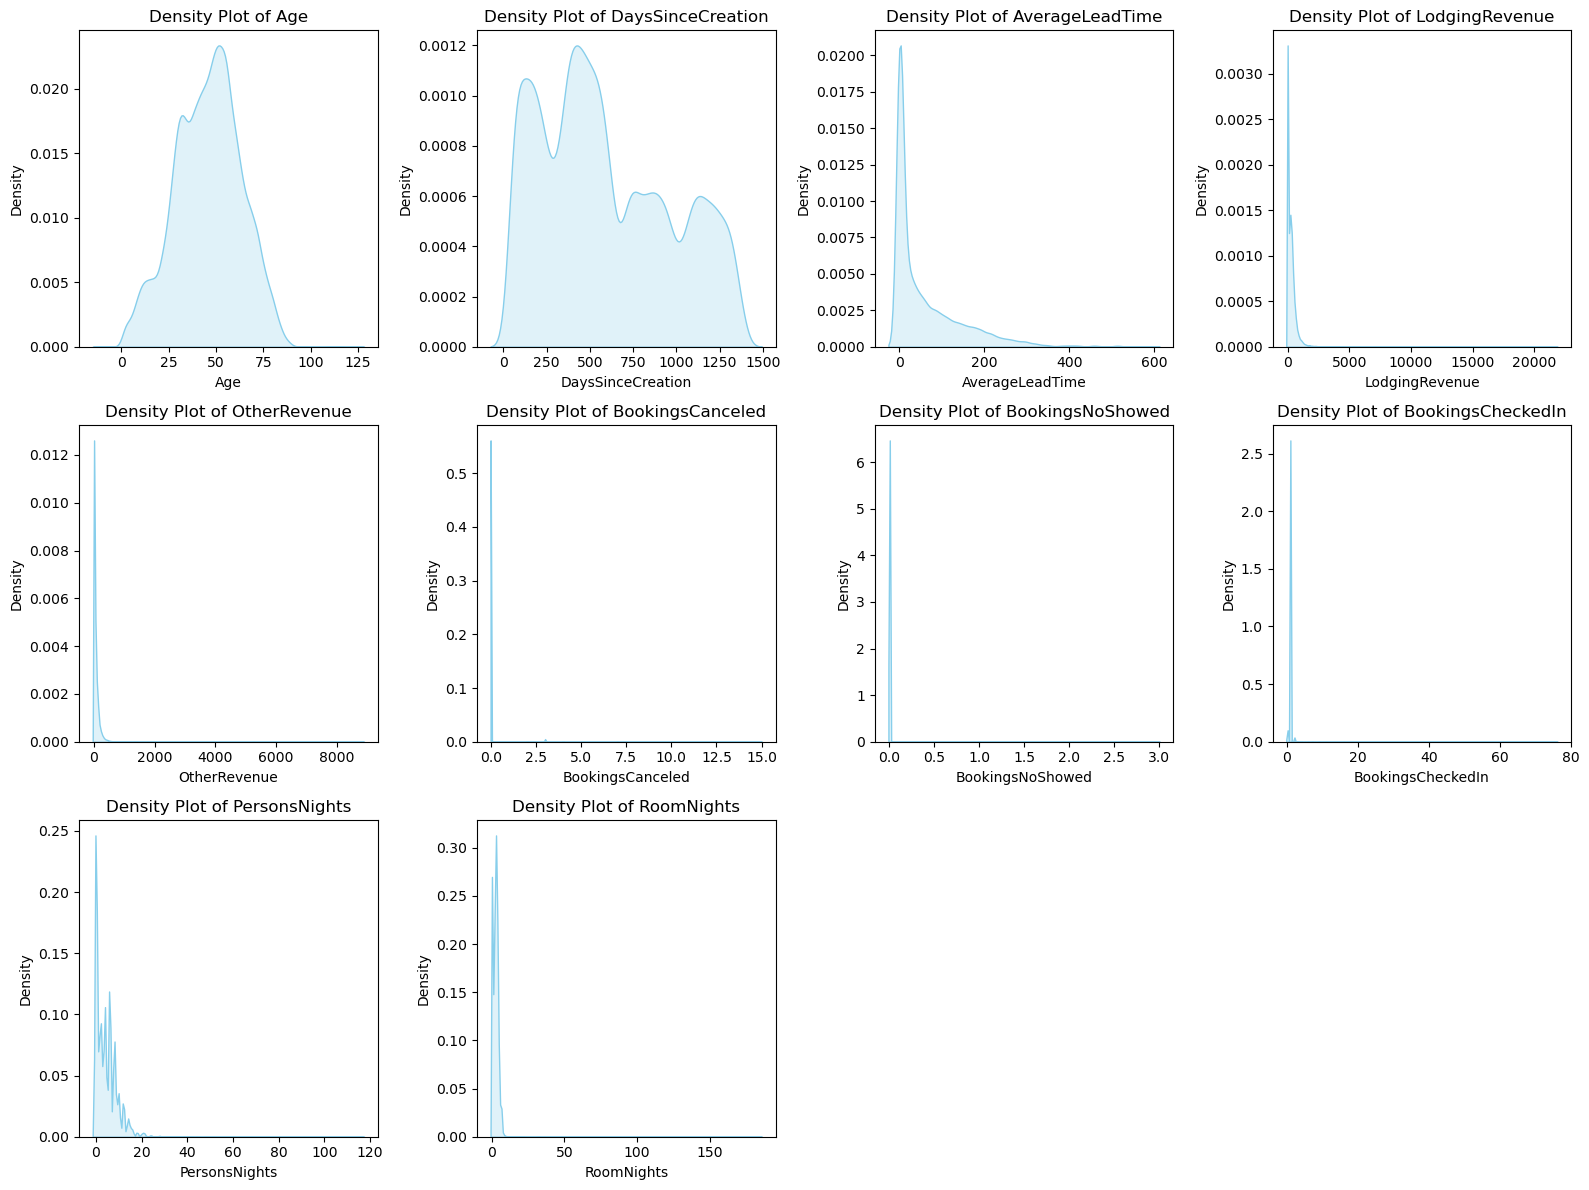

In [14]:
# Set up the grid layout (adjust rows/cols based on the number of features)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make it easier to iterate

# Loop through numerical columns and plot KDE (density) for each
for i, col in enumerate(data_num):
    sns.kdeplot(data[col], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


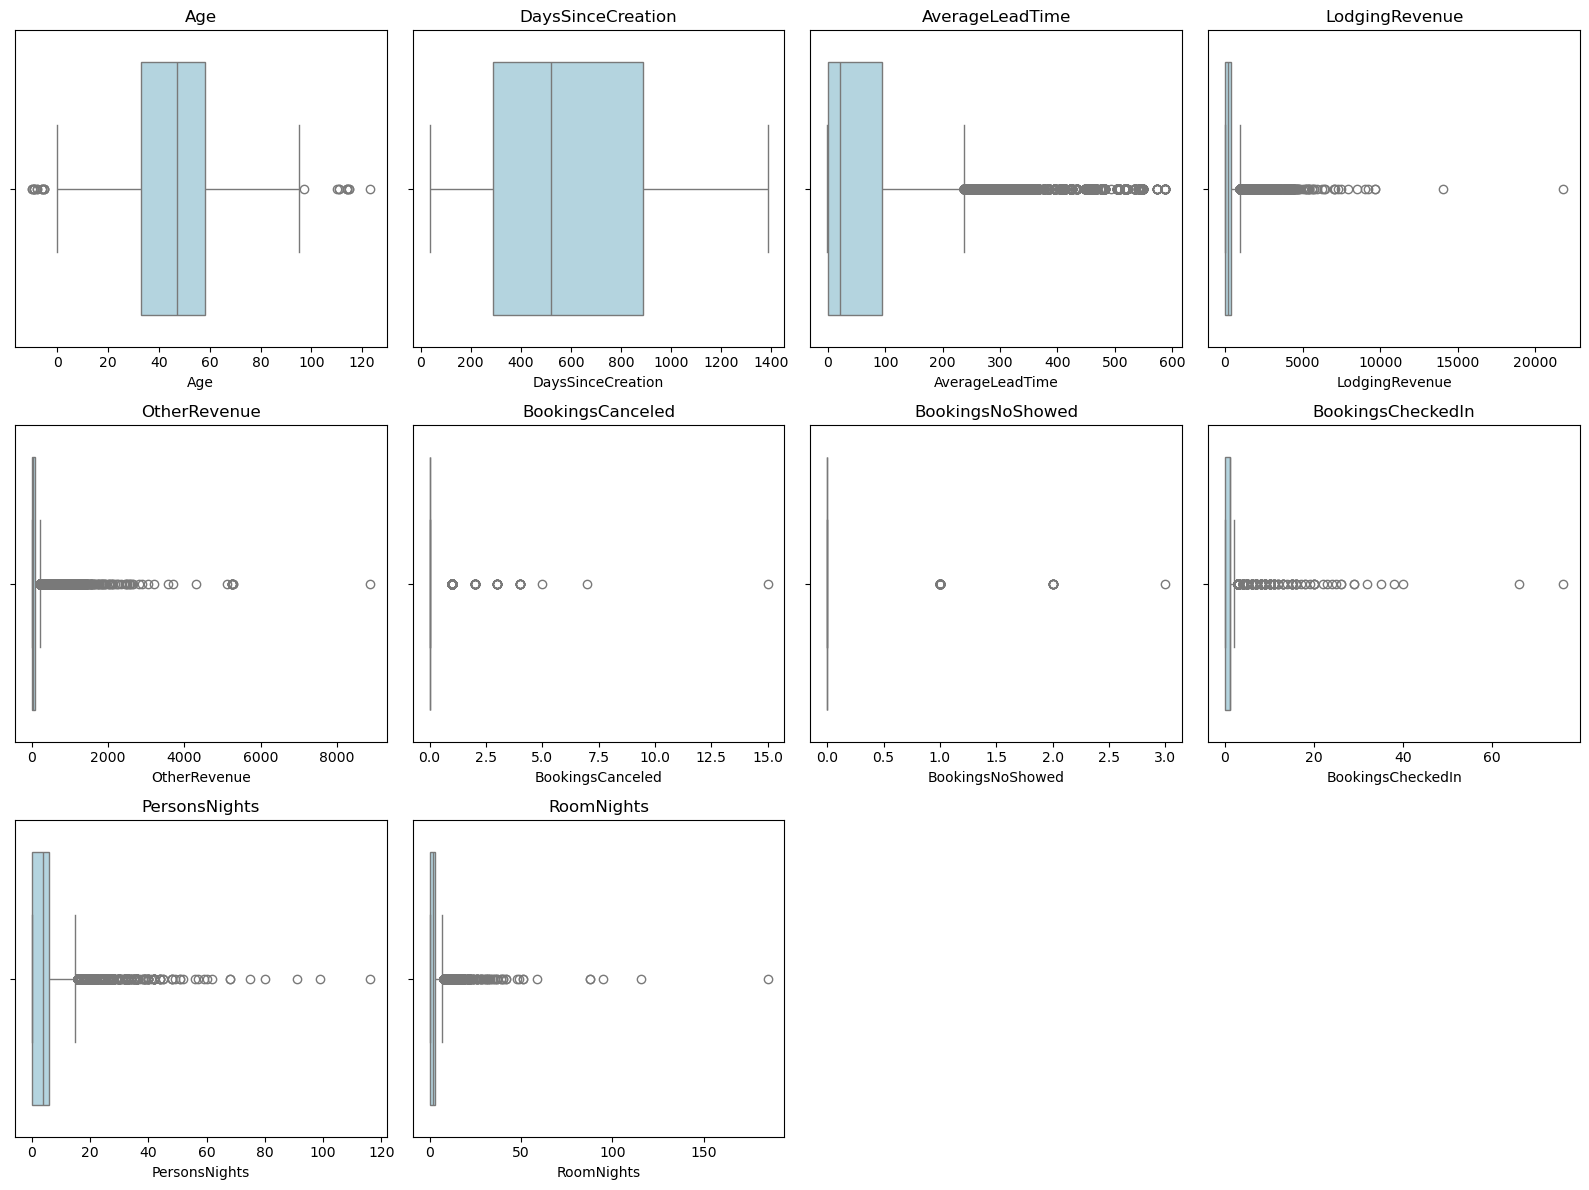

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  

for i, col in enumerate(data_num):
    sns.boxplot(x=data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## DEMOGRAPHICS 

# Age

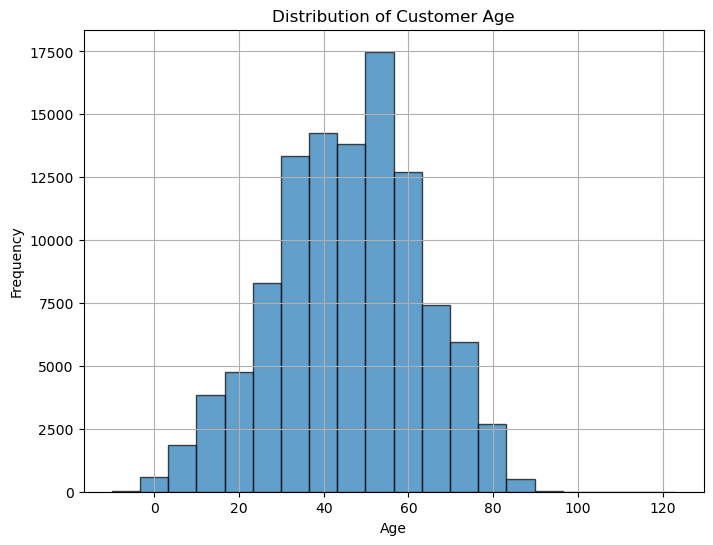

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data_num['Age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [17]:
print(len(data[data['Age']<0]))
data[data['Age']<0]

14


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
print(len(data[data['Age']>95]))
data[data['Age']>95]

10


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,0x02D4575C7FE55631DBE81E8181066109AEFDCA58973F...,0xEC8ADED0F788BA1D46CEFF00FE180192B783BDA6F184...,22,79.0,25.5,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
18912,BEL,111.0,1058,0xE000EB79EF885B1FF6DFD46A6AD03211B70002271DD8...,0xB035518A17323A61553F309E937DC06F2CCC53E8E900...,215,140.0,164.8,0,0,1,2,2,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.0,76.4,0,0,1,4,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
44525,DEU,114.0,627,0xAA6D4B36828028BE3F09FE5751DE971B7BE4B2BC038E...,0xD37FD9597B00ED4BC4EA2CB864521C48882E30DCA7AE...,7,234.0,34.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
45089,PRT,115.0,620,0xD906278493442999E6245450B8C306ABB9CA75F39032...,0xB207B868D8878FBBB1D449631EFDB684FAFC49AC57AF...,2,266.0,43.0,0,0,1,2,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
53298,ITA,123.0,543,0xE651AC190A6B9F1AEC6357AE26B7E871A54A7B5B3398...,0x21711474FF0CA1361823EDB5535B72CF6159EE1AEB43...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58052,AUT,114.0,503,0xA5F68A67139168CF952B006354B65964A2C38D79A4F5...,0xEDE630FB631373804FBF8325A0B48E67E8A8C575E7EF...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1
62694,NOR,97.0,467,0x1F09EB5D0201D9931BAD9BF82CA729A50644860D542F...,0x18EE62D4260E78AD984A206D021264B767BD3DA86FD8...,87,734.0,24.0,0,0,1,12,6,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
64256,ESP,110.0,456,0x021B0CF360983B4B2F3E2F8E5932396CB2B1749EDDED...,0xABE5DDEDEC1FB4E00F82118EDEE61F525D5303E8E421...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,1


In [19]:
# Filter customers with age < 10
children_df = data[data['Age'] < 10]

# See if they booked rooms on their own
print(children_df[['Age', 'PersonsNights', 'RoomNights', 'BookingsCheckedIn', 'SRCrib']].describe())


               Age  PersonsNights   RoomNights  BookingsCheckedIn       SRCrib
count  2456.000000    2456.000000  2456.000000        2456.000000  2456.000000
mean      5.699104       0.519951     0.206026           0.072068     0.208876
std       2.770858       2.263230     0.863789           0.261784     0.406589
min     -10.000000       0.000000     0.000000           0.000000     0.000000
25%       4.000000       0.000000     0.000000           0.000000     0.000000
50%       6.000000       0.000000     0.000000           0.000000     0.000000
75%       8.000000       0.000000     0.000000           0.000000     0.000000
max       9.000000      24.000000     8.000000           2.000000     1.000000


Mean shows that children are mostly accompanied by other adults and also normally book 2 rooms.
We can use this information for making a family traveler segment.

In [20]:
# Remove negative ages
data_num = data_num[data_num['Age'] >= 0]

# Remove extreme ages above 100
data_num = data_num[data_num['Age'] <= 100]


Fill the age with the mean?

#### Making a fusion with the low-high floor 

    If its on a low floor then 1 
    If its on a medium floor then 2
    If its on a high floor then 3

In [21]:
Check0 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check0

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [22]:
# We have 1 customer that usually asks fot a high and low floor but not medium and the same for the cases bellow
Check1 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 0)]
Check1

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26127,PRT,NaN,916,0xD9D619554D9AADB4D47DBAD05FA8DC655F924173367F...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,74,506.25,92.5,0,0,1,15,5,Direct,Direct,1,1,0,0,0,0,0,1,0,0,0,0,1


In [23]:
Check2 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 1)]
Check2

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25859,SWE,51.0,921,0x70B6FD2D234235C3DE6F4B82879F6305D0E111670AB0...,0xB524FBB5D5127698F6E182836043FBA8CCD397612416...,127,2020.0,220.0,0,0,1,8,2,Travel Agent/Operator,Other,1,0,0,1,0,0,0,1,0,0,0,0,0


In [24]:
Check3 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check3

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27802,GBR,45.0,891,0x1AF54B13068BC4F019B15A1634A3058DCF8CB3BCE045...,0x3FE43086574BC0D49ECCE2AE3E9A864449F438F860A5...,90,114.0,14.0,0,0,1,2,1,Travel Agent/Operator,Other,0,1,0,1,0,0,0,0,0,0,0,0,1


In [25]:
# This just means that the customer does not ask for a specific floor
Check4 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 0)]
Check4

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


Uncomment the code after we dealt with the costumers above and if everyone agrees

In [26]:
# def type_of_floor(row):
#     if row['SRLowFloor'] == 1:     # preference for lower floors
#         return 1
#     elif row['SRMediumFloor'] == 1: # preference for medium floors
#         return 2
#     elif row['SRHighFloor'] == 1:    # preference for higher floors
#         return 3
#     else:                           # no preference
#         return 0 



# data['SRFloor'] = data.apply(type_of_floor, axis=1)

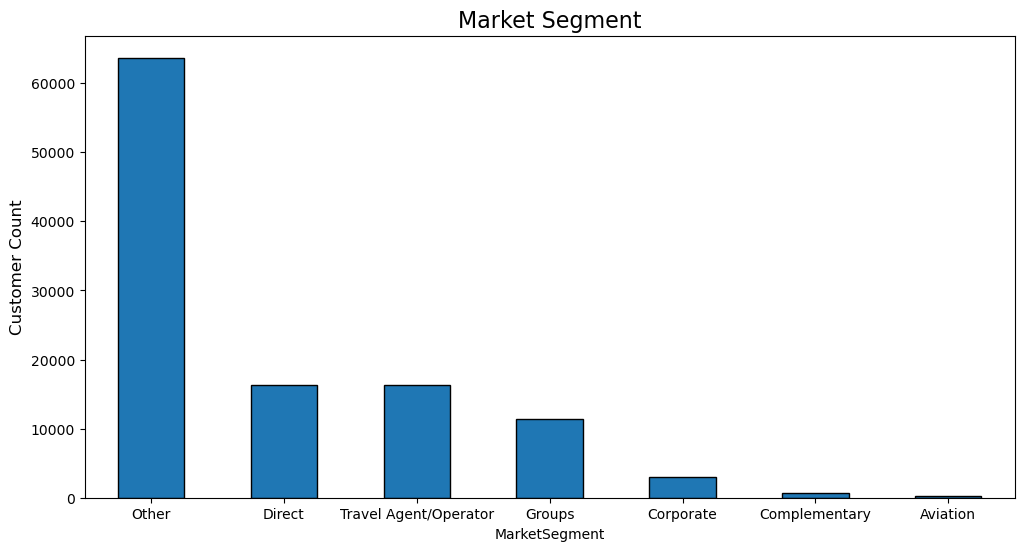

In [27]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

market_segment = data["MarketSegment"].value_counts()

market_segment.plot(kind="bar", edgecolor="black")

plt.title("Market Segment", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

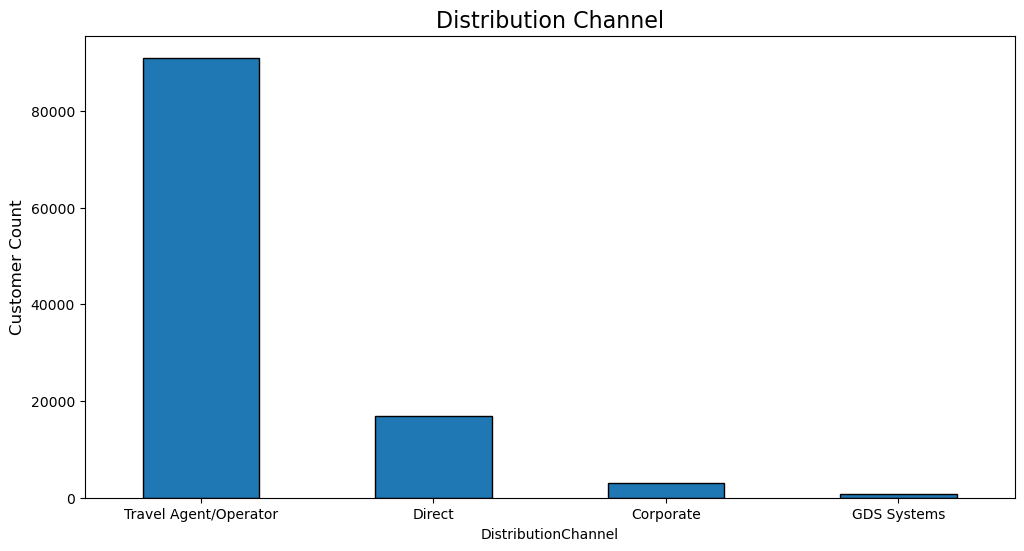

In [28]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

distribution_channel = data["DistributionChannel"].value_counts()

distribution_channel.plot(kind="bar", edgecolor="black")

plt.title("Distribution Channel", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [29]:
data["Nationality"].value_counts()

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
       ...  
BHS        1
TMP        1
TZA        1
PNG        1
BDI        1
Name: count, Length: 199, dtype: int64

In [30]:
countries = sorted(data["Nationality"].unique())
print(", ".join(sorted(countries)))

ABW, AFG, AGO, AIA, ALB, AND, ARE, ARG, ARM, ASM, ATA, ATF, ATG, AUS, AUT, AZE, BDI, BEL, BEN, BFA, BGD, BGR, BHR, BHS, BIH, BLR, BMU, BOL, BRA, BRB, BWA, CAF, CAN, CHE, CHL, CHN, CIV, CMR, COD, COK, COL, COM, CPV, CRI, CUB, CYM, CYP, CZE, DEU, DMA, DNK, DOM, DZA, ECU, EGY, ERI, ESP, EST, ETH, FIN, FJI, FLK, FRA, FRO, FSM, GAB, GBR, GEO, GHA, GIB, GIN, GNB, GNQ, GRC, GRD, GTM, GUF, GUY, HKG, HND, HRV, HTI, HUN, IDN, IND, IOT, IRL, IRN, IRQ, ISL, ISR, ITA, JAM, JEY, JOR, JPN, KAZ, KEN, KGZ, KIR, KNA, KOR, KWT, LAO, LBN, LBY, LCA, LIE, LKA, LTU, LUX, LVA, MAR, MCO, MDG, MDV, MEX, MKD, MLI, MLT, MMR, MNE, MOZ, MRT, MUS, MWI, MYS, NAM, NCL, NER, NGA, NIC, NLD, NOR, NPL, NRU, NZL, OMN, PAK, PAN, PCN, PER, PHL, PNG, POL, PRI, PRT, PRY, PYF, QAT, ROU, RUS, RWA, SAU, SDN, SEN, SGP, SJM, SLE, SLV, SMR, SOM, SPM, SRB, STP, SUR, SVK, SVN, SWE, SWZ, SYC, SYR, TCD, TGO, THA, TJK, TKM, TMP, TON, TTO, TUN, TUR, TWN, TZA, UGA, UKR, UMI, URY, USA, UZB, VCT, VEN, VIR, VNM, WLF, WSM, YEM, ZAF, ZWE


In [31]:
# European countries
western_europe = ["AUT", "BEL", "CHE", "DEU", "FRA", "IRL", "LIE", "LUX", "NLD", "GBR"]
eastern_europe = ["BLR", "BGR", "CZE", "HUN", "MDA", "POL", "ROU", "RUS", "SVK", "UKR"]
nordic_countries = ["DNK", "FIN", "ISL", "NOR", "SWE", "SJM", "FRO"]
southern_europe = ["ALB", "AND", "BIH", "CYP", "ESP", "GRC", "HRV", "ITA", "MLT", "MKD", "MNE", "PRT", "SMR", "SRB", 
                   "SVN"]


# Asian countries
asian_countries = ["AFG", "ARM", "AZE", "BHR", "BGD", "BRN", "BTN", "CHN", "HKG", "IDN", "IND", "IRN", "IRQ", 
                   "ISR", "JOR", "JPN", "KAZ", "KGZ", "KOR", "KWT", "LAO", "LBN", "LKA", "MDV", "MMR", "MNG", 
                   "MYS", "NPL", "OMN", "PAK", "PHL", "QAT", "SAU", "SGP", "SYR", "TJK", "TKM", "TMP", "THA", 
                   "TUR", "TWN", "UZB", "VNM", "YEM"]

# African countries
african_countries = ["AGO", "BDI", "BEN", "BFA", "CAF", "CIV", "CMR", "COD", "COM", "CPV", "DJI", "DZA", "EGY", 
                     "ERI", "ETH", "GAB", "GHA", "GIN", "GMB", "GNB", "GNQ", "KEN", "LBR", "LBY", "LSO", "MAR", 
                     "MDG", "MLI", "MOZ", "MRT", "MUS", "MWI", "NAM", "NER", "NGA", "RWA", "SDN", "SEN", "SLE", 
                     "SOM", "STP", "SWZ", "SYC", "TCD", "TGO", "TUN", "TZA", "UGA", "ZAF", "ZMB", "ZWE"]

# North American countries (including Central America & Caribbean)
north_american_countries = ["AIA", "ATG", "ABW", "BHS", "BRB", "BMU", "BLZ", "CAN", "CRI", "CUB", "CYM", "DMA", 
                            "DOM", "GRD", "GTM", "HND", "HTI", "JAM", "KNA", "LCA", "MEX", "NIC", "PAN", "PRI", 
                            "SLV", "TTO", "USA", "VIR", "VCT"]

# South American countries
south_american_countries = ["ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GUY", "PRY", "PER", "SUR", "URY", "VEN"]

# Oceania countries
oceania_countries = ["AUS", "FJI", "KIR", "NRU", "NCL", "NZL", "PCN", "PNG", "PYF", "SLB", "TON", "WSM", "WLF"]

region = [western_europe, eastern_europe, nordic_countries, southern_europe, asian_countries, african_countries, 
          north_american_countries, south_american_countries, oceania_countries]
region_names = ["Western Europe", "Eastern Europe", "Nordic Countries", "Southern Europe", "Asia", "Africa", 
                "North America", "South America", "Oceania"]

# Mapping dictionary
country_region_mapping = {country: region for region, countries in zip(region_names, region) for country in countries}

# Create new column 
data["Region"] = data["Nationality"].map(country_region_mapping)

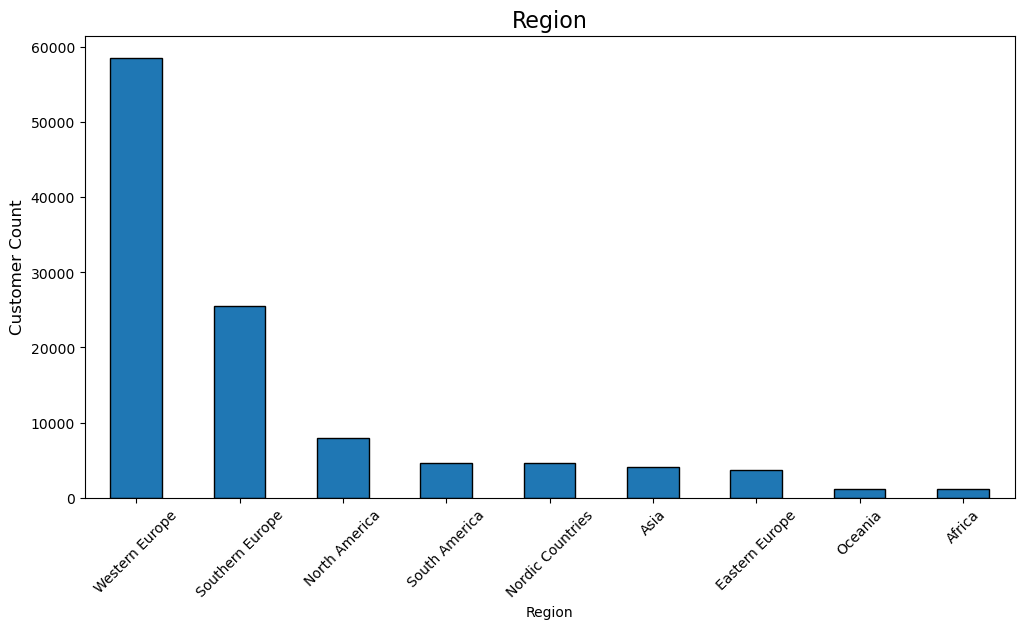

In [32]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

region_nationality = data["Region"].value_counts()

region_nationality.plot(kind="bar", edgecolor="black")

plt.title("Region", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Spending behaviour by country?

## BEHVIOURAL DATA


## Days Since Creation

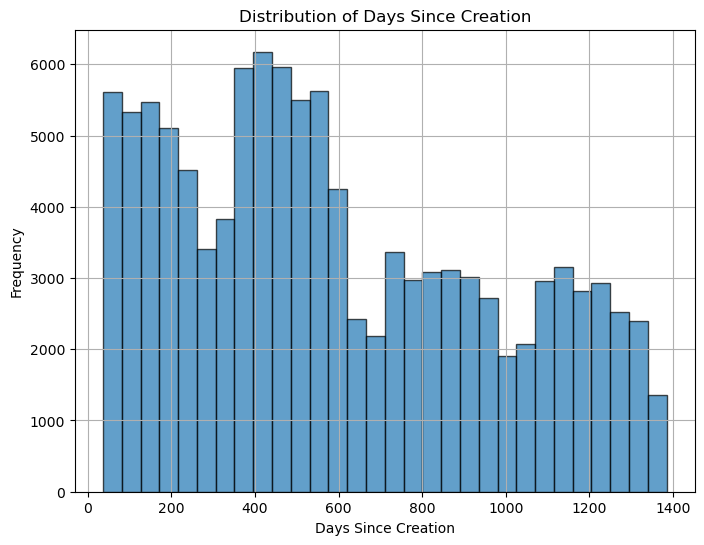

In [33]:
# plot a histogram of DaysSinceCreation column
plt.figure(figsize=(8, 6))
plt.hist(data['DaysSinceCreation'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Days Since Creation')
plt.xlabel('Days Since Creation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()  

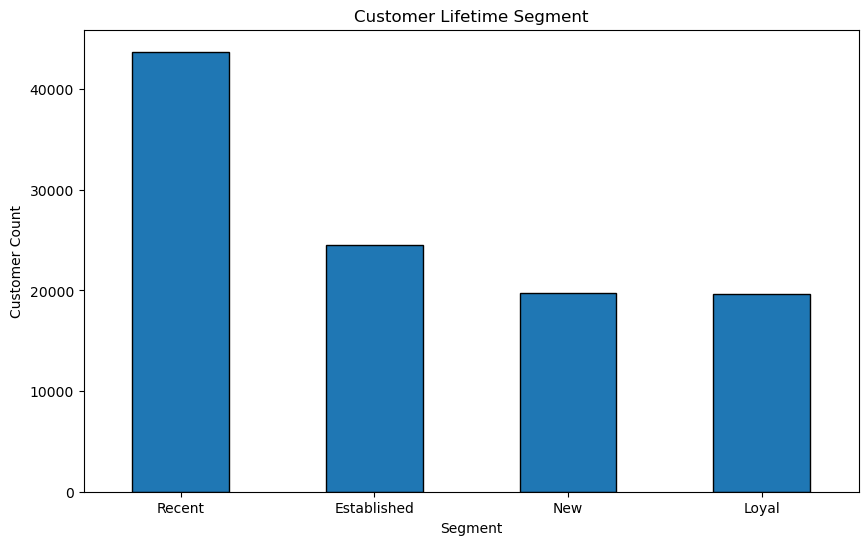

In [34]:
# Create a segmentation column based on DaysSinceCreation
data_num['CustomerLifetimeSegment'] = pd.cut(data_num['DaysSinceCreation'],
                                        bins=[0, 200, 600, 1000, 1500],
                                        labels=['New', 'Recent', 'Established', 'Loyal'])

# Plot a bar chart
plt.figure(figsize=(10, 6))
data_num['CustomerLifetimeSegment'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Customer Lifetime Segment')
plt.ylabel('Customer Count')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.show()

## Distribution Channel

In [35]:
data_cat['DistributionChannel'].value_counts()

DistributionChannel
Travel Agent/Operator    91019
Direct                   16883
Corporate                 3135
GDS Systems                696
Name: count, dtype: int64

Travel Agent/Operator (Majority)
- Check cancelation trends
Direct (through the hotel's website)
- Check for trend of loyal customers or higher spending
Corporate
- Maybe shorter lead times and higher spending and primium services.
GDS Systems (Global Distribution Systems)
- travel agencies and corporate travel planners

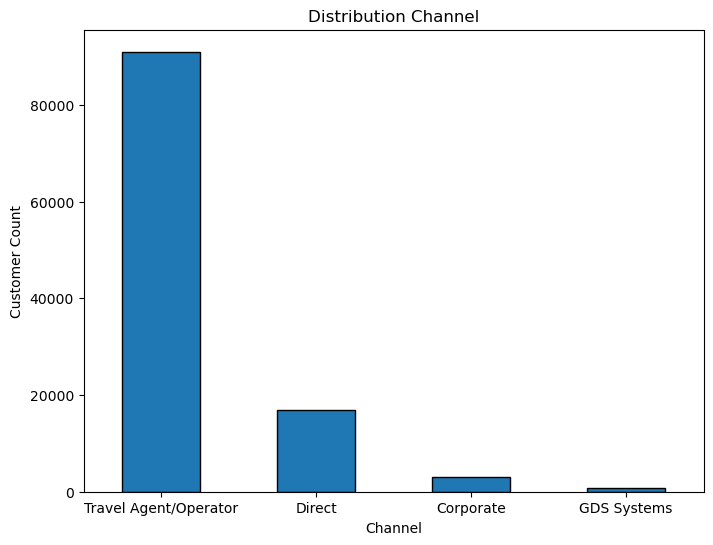

In [36]:
#Plot a histogram of DistributionChannel column
plt.figure(figsize=(8, 6))
data_cat['DistributionChannel'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution Channel')
plt.ylabel('Customer Count')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.show()

## Market Segmentation

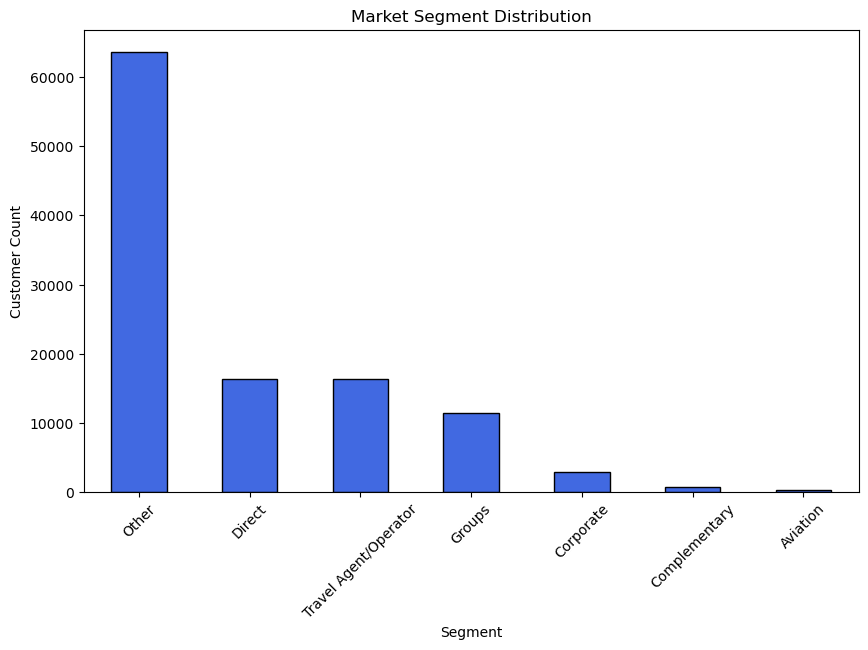

In [37]:
plt.figure(figsize=(10,6))
data_cat['MarketSegment'].value_counts().plot(kind='bar', color='royalblue', edgecolor='black')
plt.title('Market Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)  # Rotate text by 45 degrees
plt.show()


## Revenue 

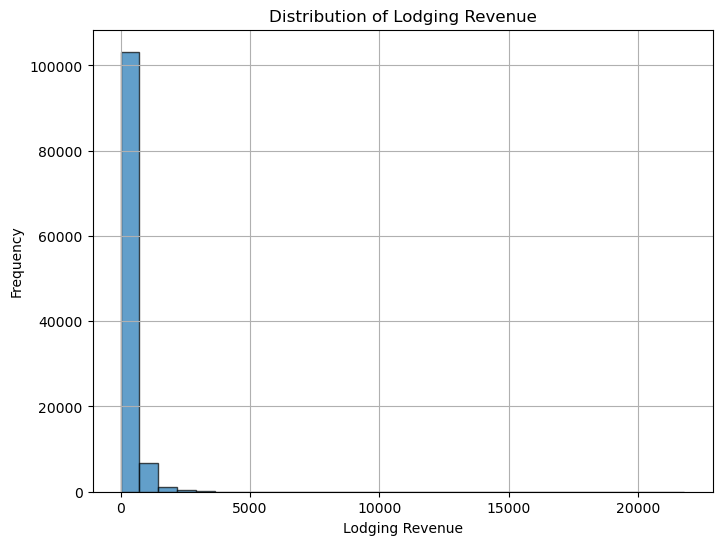

In [38]:
# Plot histogram of lodging revenue
plt.figure(figsize=(8, 6))
plt.hist(data['LodgingRevenue'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Lodging Revenue')
plt.xlabel('Lodging Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [39]:
# Count of zero/negative revenue entries
print(len(data[data['LodgingRevenue'] < 0]))
print(len(data[data['LodgingRevenue'] == 0])) # 0 revenue entries

# Show the rows with zero/negative revenue
data[data['LodgingRevenue'] <= 0]   #Inactive profiles
# Most of the customers with zero revenue are inactive, with no bookings checked in or cancelled.



0
33769


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Region
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Western Europe
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Western Europe
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,Asia
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,Western Europe
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0,Southern Europe
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,1,0,0,0,0,0,0,0,1,1,0,0,0,North America
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,Western Europe


In [40]:
#define zero-revenue customers
zero_revenue_customers = data[data['LodgingRevenue'] == 0]
# Check their booking activity
zero_revenue_analysis = zero_revenue_customers[['LodgingRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']]

# Display the filtered data
print(zero_revenue_analysis)

# Summary statistics for these customers
print(zero_revenue_analysis.describe())

# Count of zero-revenue customers by booking status
zero_revenue_counts = zero_revenue_customers[['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']].sum()
print(zero_revenue_counts)

        LodgingRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn
ID                                                                           
3                  0.0                 0                 0                  0
5                  0.0                 0                 0                  0
7                  0.0                 0                 0                  0
9                  0.0                 0                 0                  0
11                 0.0                 0                 0                  0
...                ...               ...               ...                ...
111724             0.0                 0                 0                  0
111726             0.0                 0                 0                  0
111729             0.0                 0                 0                  0
111731             0.0                 0                 0                  0
111733             0.0                 0                 0      

These could be customer accounts that were created but never booked a stay.
Since cancellations and no-shows are almost zero, these guests never made a reservation.

The 718 checked-in customers might have been staying for free due to:
- Hotel promotions
- VIP guests
- Employees or airline crew agreements

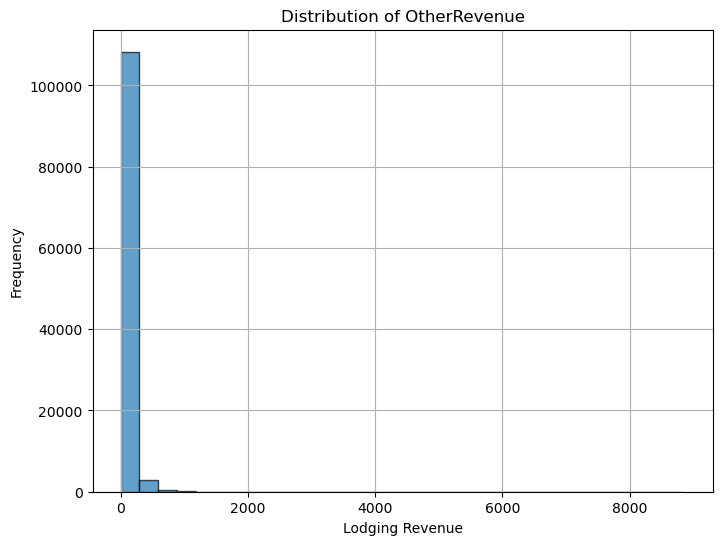

In [41]:
# Plot histogram of lodging revenue
plt.figure(figsize=(8, 6))
plt.hist(data['OtherRevenue'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of OtherRevenue')
plt.xlabel('Lodging Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The majority of customers have very low or zero additional spending. The peak near zero suggests that many guests do not spend on extra services. A small number of guests contribute significantly to other hotel revenue.

In [42]:
# Count customers with 0 OtherRevenue
print(len(data[data['OtherRevenue'] == 0]))  

# Count customers with more than 0 OtherRevenue
print(len(data[data['OtherRevenue'] != 0]))  # Use '!=' instead of '=!'


33552
78181


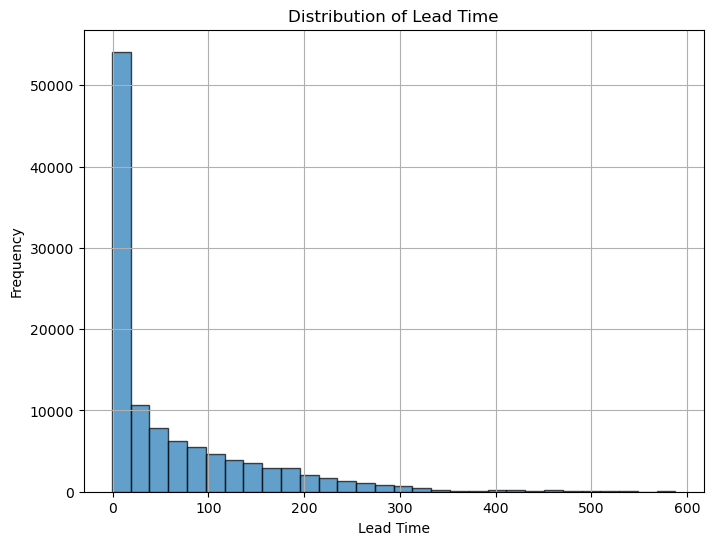

In [43]:
# Average Lead Time 
# plot a histogram of LeadTime column
plt.figure(figsize=(8, 6))
plt.hist(data['AverageLeadTime'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

1. Most Bookings Have a Very Short Lead Time

The highest frequency of bookings occurs at 0–10 days lead time.
This suggests that many customers book at the last minute.

2. A Gradual Decline in Bookings as Lead Time Increases
As the lead time increases, the number of bookings steadily decreases.
However, there are still some long lead-time bookings (200+ days), likely from early planners, corporate travelers, or group bookings.

3. Possible Customer Segmentation Based on Lead Time

* Last-Minute Bookers (0-7 days) → Primarily business travelers, locals, or spontaneous leisure travelers who make urgent bookings. These guests may prioritize convenience over price and often book directly with the hotel.

* Short-Term Planners (8-30 days) → Includes standard vacationers who plan their trips within a month but do not book too far in advance. These guests might be price-sensitive and influenced by promotions or seasonal availability.

* Mid-Term Planners (31-90 days) → Typically families, international travelers, and well-planned vacationers. They book ahead to secure preferred dates, room types, or early-bird discounts.

* Long-Term Planners (91-180 days) → Group travelers, corporate event attendees, and seasonal tourists fall into this category. These bookings are more structured, often through travel agencies or corporate deals.

* Early Bookers (180+ days) → Guests booking six months or more in advance, likely wedding parties, large events, or package tours. They require flexibility and premium experiences and often use travel operators for reservations.

LeadTimeSegment
Mid-Term       21682
Long-Term      17472
Short-Term     14925
Early          11546
Last-Minute     9417
Name: count, dtype: int64


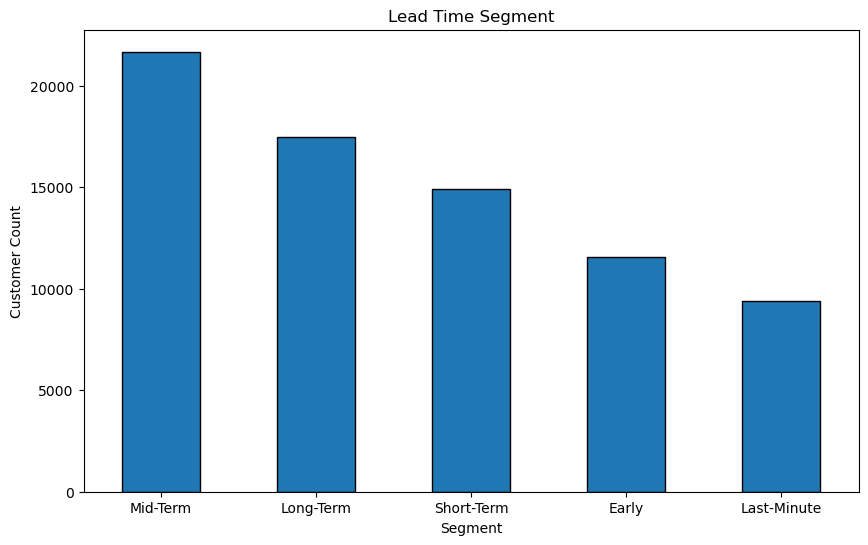

In [44]:
# Define lead time bins
bins = [0, 7, 30, 90, 180, float('inf')]  
labels = ['Last-Minute', 'Short-Term', 'Mid-Term', 'Long-Term', 'Early']

# Apply binning
data['LeadTimeSegment'] = pd.cut(data['AverageLeadTime'], bins=bins, labels=labels, right=True)

# View distribution
print(data['LeadTimeSegment'].value_counts())

# Plot a bar chart
plt.figure(figsize=(10, 6))
data['LeadTimeSegment'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Lead Time Segment')
plt.ylabel('Customer Count')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.show()


In [45]:
# Calculate cancellation and no-show rates
data['CancellationRate'] = data['BookingsCanceled'] / (data['BookingsCanceled'] + data['BookingsCheckedIn'])
data['NoShowRate'] = data['BookingsNoShowed'] / (data['BookingsNoShowed'] + data['BookingsCheckedIn'])
# It calculates the proportion of customers who actually checked in, relative to all bookings made.

# View average rates
print(data[['CancellationRate', 'NoShowRate']].mean())

# Compare by lead time segments
print(data.groupby('LeadTimeSegment')[['CancellationRate', 'NoShowRate']].mean())


CancellationRate    0.000626
NoShowRate          0.000178
dtype: float64
                 CancellationRate  NoShowRate
LeadTimeSegment                              
Last-Minute              0.001704    0.000577
Short-Term               0.001285    0.000306
Mid-Term                 0.000310    0.000090
Long-Term                0.000097    0.000029
Early                    0.000043    0.000000


/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/3990191223.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('LeadTimeSegment')[['CancellationRate', 'NoShowRate']].mean())


* Last-Minute bookers (0-7 days) have the highest cancellation & no-show rates.
* Cancellations & no-shows drop significantly for early bookers (90+ days).

In [46]:
# Check-in rate per segment
data['CheckInRate'] = data['BookingsCheckedIn'] / (data['BookingsCheckedIn'] + data['BookingsCanceled'] + data['BookingsNoShowed'])
print(data.groupby('MarketSegment')['CheckInRate'].mean())

# Check-in rate per distribution channel
print(data.groupby('DistributionChannel')['CheckInRate'].mean())

# Compare spending behavior of high vs. low check-in guests
print(data.groupby('CheckInRate')[['LodgingRevenue', 'OtherRevenue']].mean())


MarketSegment
Aviation                 0.969787
Complementary            0.991438
Corporate                0.988391
Direct                   0.998847
Groups                   0.999836
Other                    0.999937
Travel Agent/Operator    0.999809
Name: CheckInRate, dtype: float64
DistributionChannel
Corporate                0.986816
Direct                   0.998634
GDS Systems              0.999746
Travel Agent/Operator    0.999854
Name: CheckInRate, dtype: float64
             LodgingRevenue  OtherRevenue
CheckInRate                              
0.000000           0.000000      0.000000
0.333333         125.400000     10.500000
0.500000         488.049474    109.066140
0.600000        1364.000000    372.500000
0.666667         652.942000    118.822571
0.692308         599.000000    112.000000
0.700000         752.296667    153.166667
0.714286         796.000000    194.133333
0.727273         330.500000     36.000000
0.733333        1599.000000    206.000000
0.740741        1865

* Check-In Rates are Near 100% Across All Segments
* The hotel experiences very few cancellations/no-shows at check-in, meaning revenue predictions based on reservations should be very stable.
* Guests with a higher check-in rate are generally high spenders, especially in lodging revenue.

In [48]:
# Describe Person Nights
data['PersonsNights'].describe()

count    111733.000000
mean          4.328318
std           4.630739
min           0.000000
25%           0.000000
50%           4.000000
75%           6.000000
max         116.000000
Name: PersonsNights, dtype: float64

* Most customers stay for 4 nights, with a maximum of 116 nights.

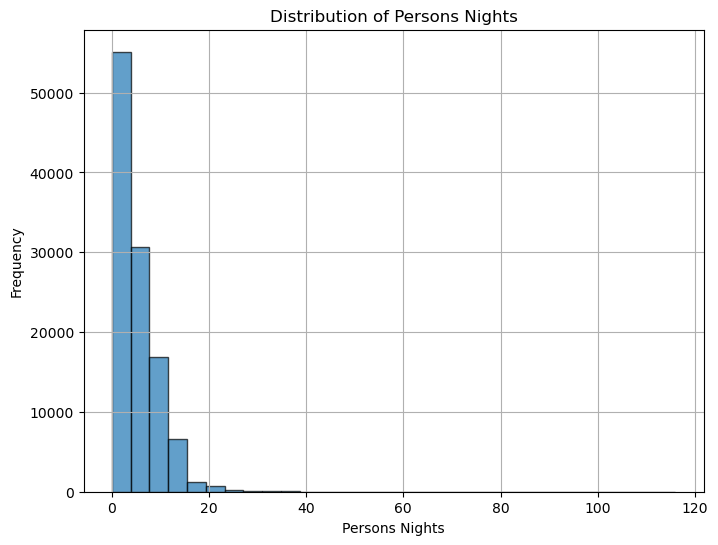

In [49]:
# Plot a histogram of PersonsNights column
plt.figure(figsize=(8, 6))
plt.hist(data['PersonsNights'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Persons Nights')
plt.xlabel('Persons Nights')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* The highest frequency of stays is concentrated between 1-5 nights.
* Very few bookings exceed 15 nights, making extended stays uncommon.
* The distribution is right-skewed, meaning there are some long-stay outliers but most bookings are short.

In [54]:
# Chck for negative values
print(len(data[data['PersonsNights'] < 0]))

0


In [ ]:
#check for more than 6 persons Nights
print(len(data[data['PersonsNights'] > 6]))
# Show the rows with more than 6 persons
data[data['PersonsNights'] > 6]

26235


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,Region,LeadTimeSegment,CancellationRate,NoShowRate,CheckInRate,PersonNightsSegment
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.00,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Southern Europe,Mid-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.00,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Western Europe,Long-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.00,94.00,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,Western Europe,Mid-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
12,FRA,59.0,1385,0x9773ECFA3572DCCFE097CC5805ECE3AEEDBD1B66BA1B...,0x12F12B83127CC791501A7CA3A4639083297467BB8641...,60,292.00,81.00,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,Western Europe,Mid-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
14,ESP,43.0,1385,0x22CB5B109DC9801904205B8262ADEE0331BF6DAFB62C...,0x7ECC2FE7D7953C6903AF4418A122C998F2ED706D029E...,87,327.70,48.00,0,0,1,8,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0,Southern Europe,Mid-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111718,NLD,56.0,37,0x3509CDB2095FA9E2DE9E28316176130A69C2DE970EA8...,0x311C32AFC5B4F0815FAAE98F45D37CB26E16E43B51BF...,65,665.80,124.65,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,Western Europe,Mid-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
111723,GBR,55.0,37,0x7916E3AEFBF2F1ABC7301EC015B71FF9FB4AE844DA9F...,0xDA6DD0D7A037E2F3A73C5F9969E85D8CEEB196F57469...,20,808.00,216.10,0,0,1,8,4,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0,Western Europe,Short-Term,0.0,0.0,1.0,Long Stay (8-14 nights)
111725,ESP,60.0,37,0x0BD0E67519BA9C6A100F53BE45C8B5E4FDFE79CAB071...,0xF47AA4F8422F4922863FAA5F18E30E6F8A9981D1EE7C...,43,875.00,167.80,0,0,1,10,5,Travel Agent/Operator,Other,1,0,0,0,0,0,0,0,1,1,0,0,0,Southern Europe,Mid-Term,0.0,0.0,1.0,Long Stay (8-14 nights)


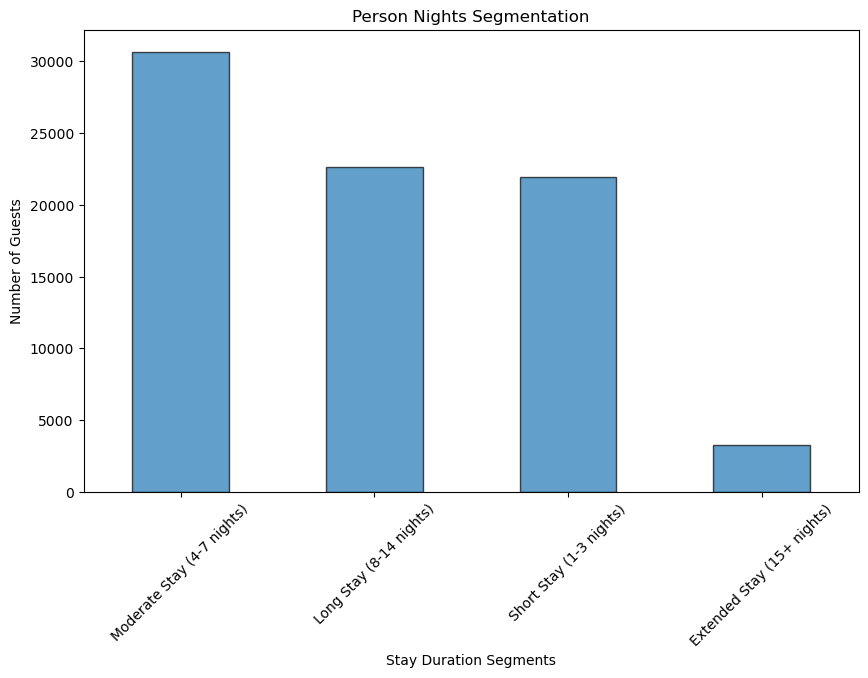

In [53]:
# Define bins for segmenting Person Nights
bins = [0, 3, 7, 14, float('inf')]  # Defining the range of stay durations
labels = ['Short Stay (1-3 nights)', 'Moderate Stay (4-7 nights)', 'Long Stay (8-14 nights)', 'Extended Stay (15+ nights)']

# Create a new column for segmentation based on the bins
data['PersonNightsSegment'] = pd.cut(data['PersonsNights'], bins=bins, labels=labels, right=True)

# Count of guests in each segment
segment_counts = data['PersonNightsSegment'].value_counts()

# Visualizing the segmented person nights
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Person Nights Segmentation')
plt.xlabel('Stay Duration Segments')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()


Persons Nights is the number of quests x rooms.

For accurate representation of how long guests stay we would use Room Nights

We can estimate the number of guests by dividing Persons Nights by Room Nights


In [68]:
# Create a copy of the existing dataset
df_comparison = data.copy()
print(df_comparison.columns)



Index(['Nationality', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'Region', 'LeadTimeSegment',
       'CancellationRate', 'NoShowRate', 'CheckInRate', 'PersonNightsSegment'],
      dtype='object')


In [71]:
df_comparison['NumGuests'] = df_comparison['PersonsNights'] / df_comparison['RoomNights']

# Handle infinite values and drop NaNs
df_comparison['NumGuests'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_comparison.dropna(subset=['NumGuests'], inplace=True)

/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/2555777994.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comparison['NumGuests'].replace([np.inf, -np.inf], np.nan, inplace=True)


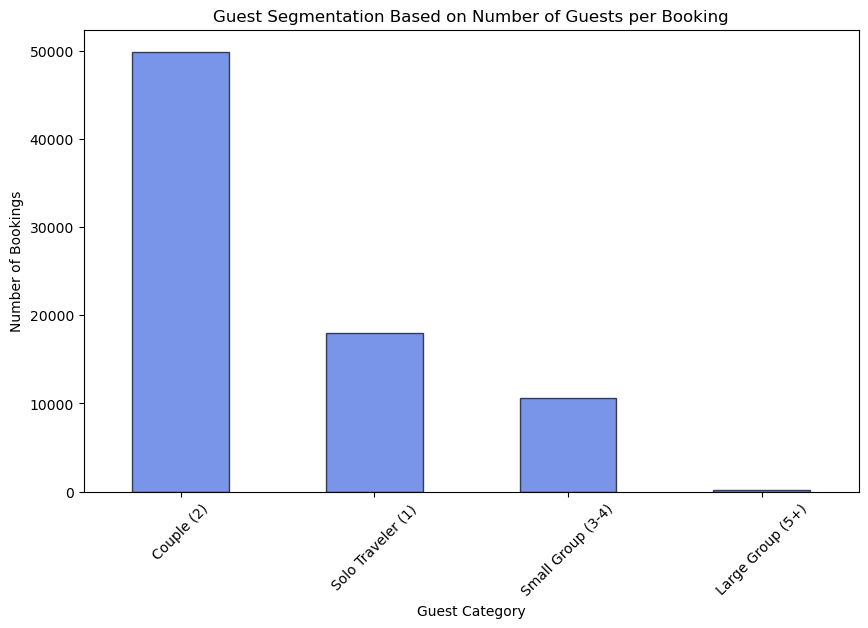

In [72]:
# Segment NumGuests into categories
bins = [0, 1, 2, 4, float('inf')]
labels = ['Solo Traveler (1)', 'Couple (2)', 'Small Group (3-4)', 'Large Group (5+)']

df_comparison['GuestCategory'] = pd.cut(df_comparison['NumGuests'], bins=bins, labels=labels, right=True)

# Count of guests in each category
guest_category_counts = df_comparison['GuestCategory'].value_counts()

# Visualizing Guest Segmentation
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
guest_category_counts.plot(kind='bar', color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Guest Segmentation Based on Number of Guests per Booking')
plt.xlabel('Guest Category')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


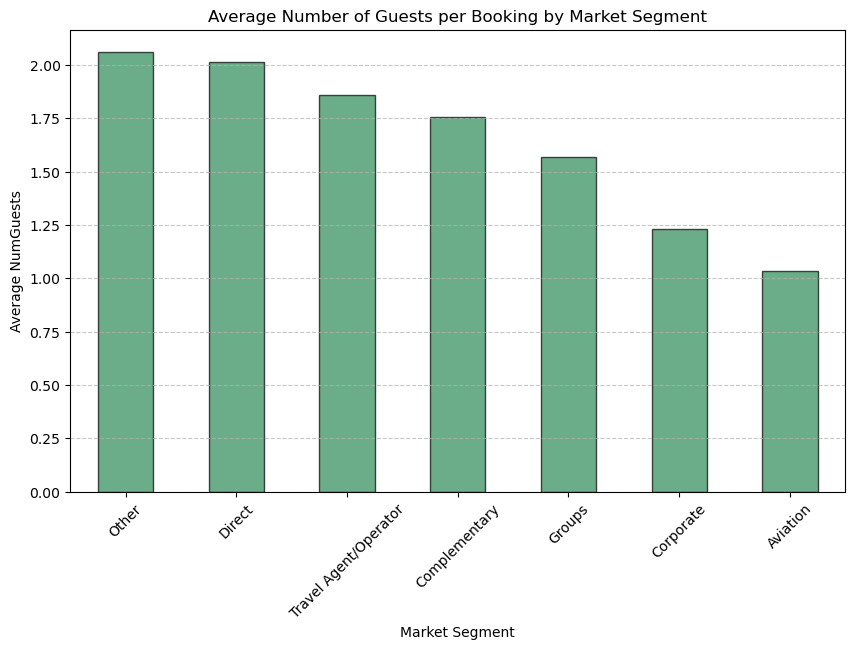

In [73]:
# Compare NumGuests across Market Segments
num_guests_by_segment = df_comparison.groupby('MarketSegment')['NumGuests'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
num_guests_by_segment.plot(kind='bar', color='seagreen', edgecolor='black', alpha=0.7)
plt.title('Average Number of Guests per Booking by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average NumGuests')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/1097821069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_guest_category = df_comparison.groupby('GuestCategory')[['LodgingRevenue', 'OtherRevenue']].mean()


<Figure size 1000x600 with 0 Axes>

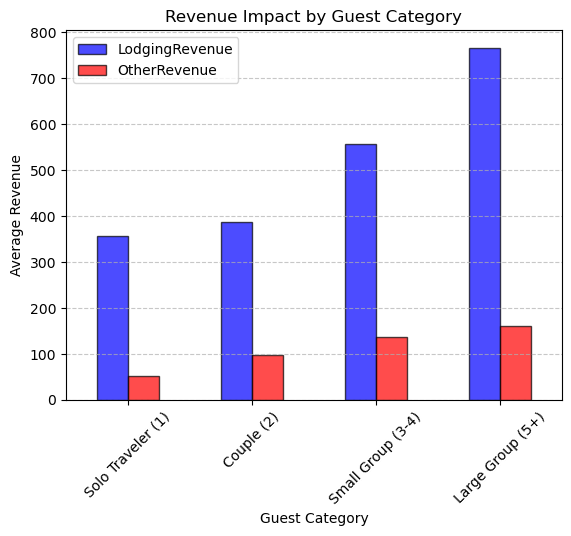

In [76]:
# Analyze Revenue Impact of NumGuests
revenue_by_guest_category = df_comparison.groupby('GuestCategory')[['LodgingRevenue', 'OtherRevenue']].mean()

# Plotting the revenue impact
plt.figure(figsize=(10,6))
revenue_by_guest_category.plot(kind='bar', color=['blue', 'red'], edgecolor='black', alpha=0.7)
plt.title('Revenue Impact by Guest Category')
plt.xlabel('Guest Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [78]:
# Define age groups
bins = [0, 18, 35, 55, 75, float('inf')]
labels = ['Under 18', 'Young Adults (18-35)', 'Middle-Aged (36-55)', 'Older Adults (56-75)', 'Seniors (75+)']

# Apply segmentation
df_comparison['AgeGroup'] = pd.cut(df_comparison['Age'], bins=bins, labels=labels, right=False)

# Confirm creation
print(df_comparison[['Age', 'AgeGroup']].head(10))


     Age              AgeGroup
ID                            
1   52.0   Middle-Aged (36-55)
2    NaN                   NaN
4   61.0  Older Adults (56-75)
6   55.0  Older Adults (56-75)
8   33.0  Young Adults (18-35)
10  26.0  Young Adults (18-35)
12  59.0  Older Adults (56-75)
14  43.0   Middle-Aged (36-55)
16  69.0  Older Adults (56-75)
17  73.0  Older Adults (56-75)


/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/3638394732.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stay = df_comparison.groupby('AgeGroup')[['RoomNights', 'PersonsNights']].mean()


<Figure size 1000x600 with 0 Axes>

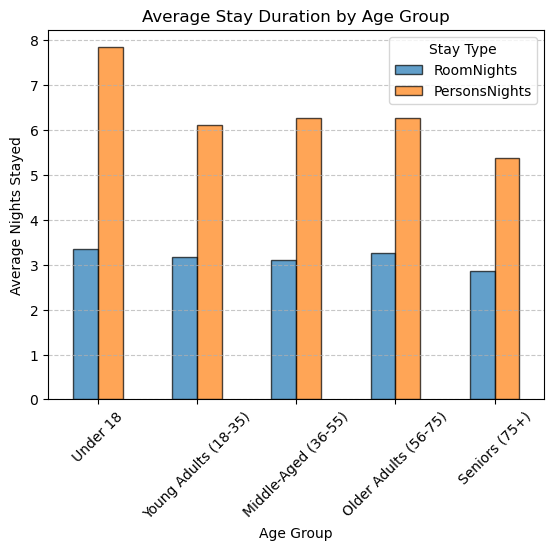

In [79]:
# Analyze Stay Duration by Age Group
age_group_stay = df_comparison.groupby('AgeGroup')[['RoomNights', 'PersonsNights']].mean()

# Visualizing Stay Duration by Age Group
plt.figure(figsize=(10,6))
age_group_stay.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Average Stay Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Nights Stayed')
plt.xticks(rotation=45)
plt.legend(title="Stay Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/812571563.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_guests = df_comparison.groupby(['AgeGroup', 'GuestCategory']).size().unstack()


<Figure size 1000x600 with 0 Axes>

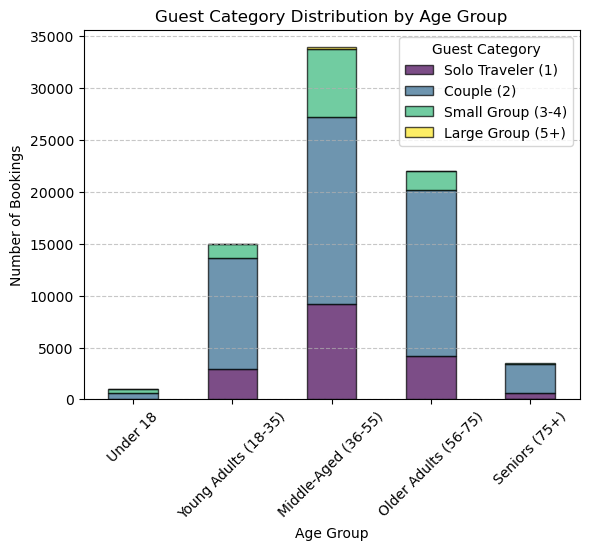

In [81]:
# Compare Guest Categories Across Age Groups
age_group_guests = df_comparison.groupby(['AgeGroup', 'GuestCategory']).size().unstack()

# Visualizing Guest Category Distribution by Age Group
plt.figure(figsize=(10,6))
age_group_guests.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', alpha=0.7)
plt.title('Guest Category Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title="Guest Category", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Middle-Aged (36-55) Guests Book the Most

- This group dominates bookings, likely families or professionals traveling for leisure & business.
- They book in all categories (solo, couples, small & large groups) but prefer small groups.

Young Adults (18-35) Travel in Pairs or Small Groups

- The most common booking type is "Couple (2)", followed by "Small Groups (3-4)".
- Fewer solo travelers compared to other age groups.

Older Adults (56-75) Prefer Traveling as Couples
- Most bookings are for 2 people.
- Very few small or large group bookings.

Seniors (75+) Travel Alone or in Pairs

- Almost no small or large group bookings.
- Most bookings are solo or couple stays.

Few Independent Bookings from "Under 18"



In [85]:
# Count number of bookings per AgeGroup & GuestCategory
age_guest_counts = df_comparison.groupby(['AgeGroup', 'GuestCategory']).size().unstack()

print("Number of bookings per Age-Guest category:\n", age_guest_counts)


Number of bookings per Age-Guest category:
 GuestCategory         Solo Traveler (1)  Couple (2)  Small Group (3-4)  \
AgeGroup                                                                 
Under 18                             62         594                374   
Young Adults (18-35)               2903       10767               1311   
Middle-Aged (36-55)                9173       17992               6614   
Older Adults (56-75)               4230       15990               1821   
Seniors (75+)                       651        2745                114   

GuestCategory         Large Group (5+)  
AgeGroup                                
Under 18                             3  
Young Adults (18-35)                 2  
Middle-Aged (36-55)                121  
Older Adults (56-75)                 5  
Seniors (75+)                        0  


/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/3803824547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_guest_counts = df_comparison.groupby(['AgeGroup', 'GuestCategory']).size().unstack()


In [86]:
# Filtering Under 18 because they are not the target audience (do not make the bookings themselves)
df_filtered = df_comparison[df_comparison['AgeGroup'] != 'Under 18']

# Re-run Revenue Analysis
revenue_by_age_guest = df_filtered.groupby(['AgeGroup', 'GuestCategory'])[['LodgingRevenue', 'OtherRevenue']].mean()
revenue_by_age_group = df_filtered.groupby('AgeGroup')[['LodgingRevenue', 'OtherRevenue']].mean()


/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/2914641060.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_guest = df_filtered.groupby(['AgeGroup', 'GuestCategory'])[['LodgingRevenue', 'OtherRevenue']].mean()
/var/folders/28/dyw7s0_j39z2g3qcp40tr5300000gn/T/ipykernel_20613/2914641060.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df_filtered.groupby('AgeGroup')[['LodgingRevenue', 'OtherRevenue']].mean()


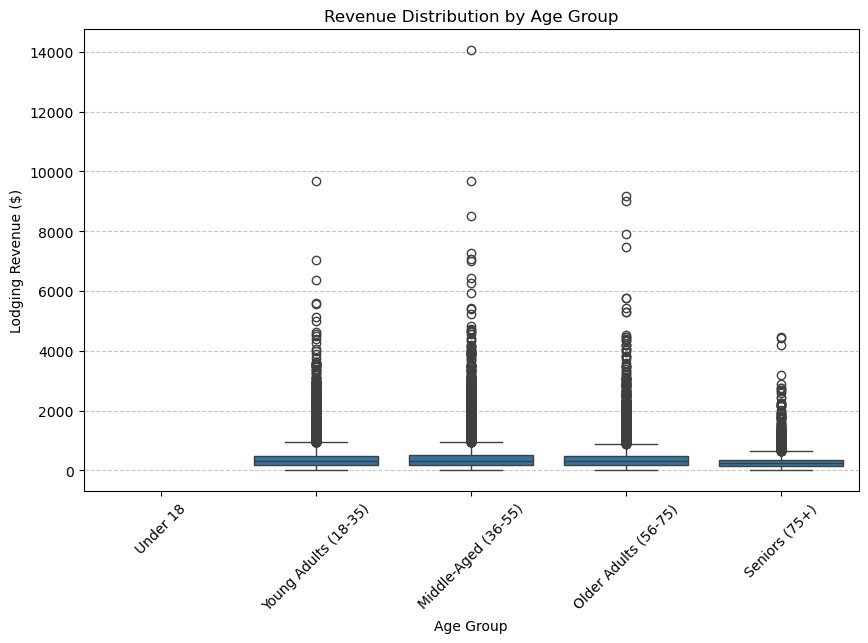

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='LodgingRevenue', data=df_filtered)
plt.title('Revenue Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Lodging Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Some customers, regardless of age, spend significantly more than others.
This suggests that a small percentage of high-spending customers drives a lot of revenue.

In [88]:
# Replace 'LodgingRevenue' with the actual revenue column name found in Step 1
correct_revenue_col = 'LodgingRevenue'  # Update this if needed

# Define high spenders as those in the top 5% revenue
high_spender_threshold = df_comparison[correct_revenue_col].quantile(0.95)

# Filter high spenders
high_spenders = df_comparison[df_comparison[correct_revenue_col] > high_spender_threshold]

# Display high spenders' details
print(high_spenders[['Age', 'AgeGroup', 'GuestCategory', correct_revenue_col]])

# Analyze High Spenders by Age Group
high_spenders_by_age = high_spenders['AgeGroup'].value_counts()


         Age              AgeGroup      GuestCategory  LodgingRevenue
ID                                                                   
31      40.0   Middle-Aged (36-55)         Couple (2)         1083.50
379     45.0   Middle-Aged (36-55)         Couple (2)         1086.00
498     67.0  Older Adults (56-75)         Couple (2)         1479.45
601     57.0  Older Adults (56-75)         Couple (2)         1753.00
808     44.0   Middle-Aged (36-55)  Solo Traveler (1)         1695.90
...      ...                   ...                ...             ...
111654  45.0   Middle-Aged (36-55)  Solo Traveler (1)         1635.84
111658  60.0  Older Adults (56-75)  Small Group (3-4)         1045.25
111661  68.0  Older Adults (56-75)  Small Group (3-4)         1045.25
111693  69.0  Older Adults (56-75)         Couple (2)         1110.30
111706  22.0  Young Adults (18-35)         Couple (2)         1042.40

[3905 rows x 4 columns]


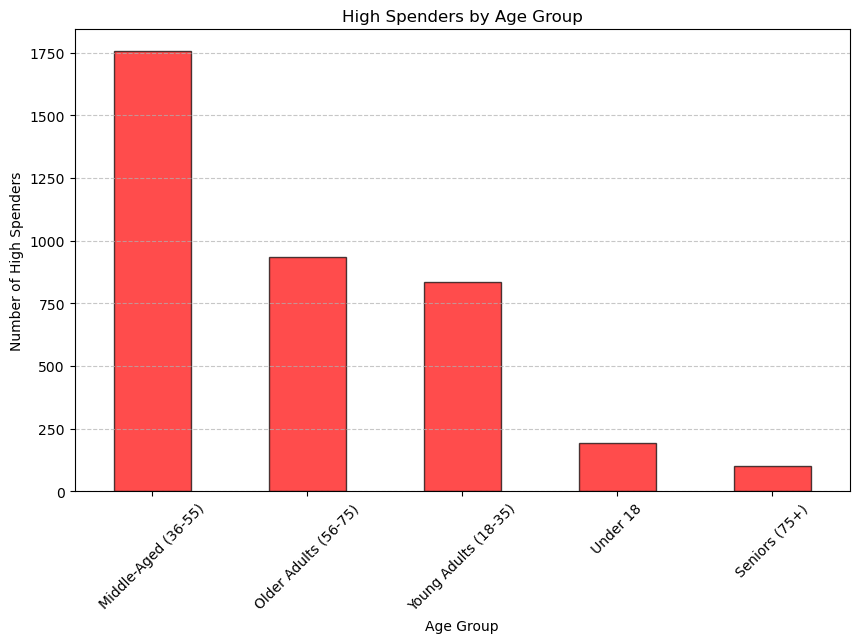

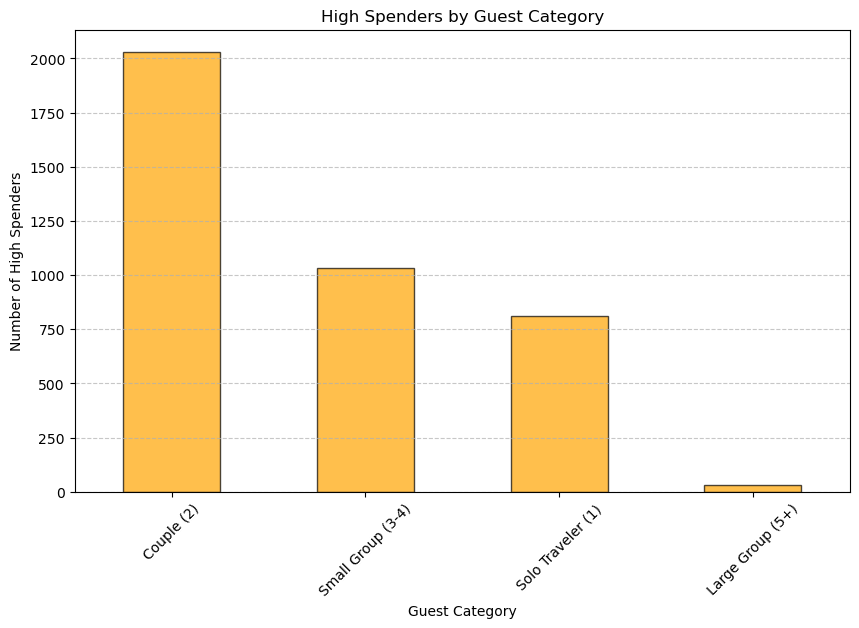

In [ ]:
# Visualizing High Spenders by Age Group
plt.figure(figsize=(10,6))
high_spenders_by_age.plot(kind='bar', color='red', edgecolor='black', alpha=0.7)
plt.title('High Spenders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of High Spenders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyze High Spenders by Guest Category
high_spenders_by_guest = high_spenders['GuestCategory'].value_counts()

# Visualizing High Spenders by Guest Category
plt.figure(figsize=(10,6))
high_spenders_by_guest.plot(kind='bar', color='orange', edgecolor='black', alpha=0.7)
plt.title('High Spenders by Guest Category')
plt.xlabel('Guest Category')
plt.ylabel('Number of High Spenders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()